In [155]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
# svc and 
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# import pickle
import numpy as np 
import pickle


In [156]:
df_main = pd.read_csv("phishing_data.csv")
df_main.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [157]:
df_main.tail()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11476,https://623112j4j3.codesandbox.io/index.html,44,25,0,3,0,0,0,0,0,...,0,zero,0,122,1338,22211,0,1,6,phishing
11477,http://en.academic.ru/dic.nsf/enwiki/279719,43,14,0,3,0,0,0,0,0,...,1,Zero,0,148,7158,2294,0,1,3,legitimate
11478,http://www.neutralsources.com/-/re.html,39,22,0,3,1,0,0,0,0,...,1,zero,0,161,570,0,0,1,2,phishing
11479,http://www.pwc.com/gx/en/financial-services/fi...,114,11,0,3,6,0,0,0,0,...,1,one,0,476,6828,5269,0,0,7,legitimate
11480,http://y9o5m.codesandbox.io/onedrive.html,41,20,0,3,0,0,0,0,0,...,0,zero,0,123,1337,20989,0,1,6,phishing


In [158]:
df_main["ip"].unique()

array(['zero', '0', '1', 'one'], dtype=object)

In [159]:
df_ = df_main[df_main["http_in_path"] == 4]

In [160]:
df_["url"].to_csv("a.csv")

In [161]:
df__ = df_main[["submit_email", "url"]]
df__

,submit_email,url
0,0,http://www.progarchives.com/album.asp?id=61737
1,0,http://signin.eday.co.uk.ws.edayisapi.dllsign....
2,0,http://www.avevaconstruction.com/blesstool/ima...
3,0,http://www.jp519.com/
4,0,https://www.velocidrone.com/
...,...,...
11476,0,https://623112j4j3.codesandbox.io/index.html
11477,0,http://en.academic.ru/dic.nsf/enwiki/279719
11478,0,http://www.neutralsources.com/-/re.html
11479,0,http://www.pwc.com/gx/en/financial-services/fi...


In [162]:
df_main.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [163]:
len(df_main)

11481

In [164]:
# Extracting....
all_coulmns = ['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
       'popup_window', 'safe_anchor', 'onmouseover', 'right_clic',
       'empty_title', 'domain_in_title', 'domain_with_copyright',
       'whois_registered_domain', 'domain_registration_length', 'domain_age',
       'web_traffic', 'dns_record', 'google_index', 'page_rank', 'status']

# here extend and reduce ...........
df_ = df_main

In [165]:
df_label  = df_["status"]
df_label

0          phishing
1          phishing
2          phishing
3        legitimate
4        legitimate
            ...    
11476      phishing
11477    legitimate
11478      phishing
11479    legitimate
11480      phishing
Name: status, Length: 11481, dtype: object

In [166]:
df_features = df_[['url', 'ip', 'length_url', 'nb_subdomains', 'nb_hyphens', 'nb_at', 'nb_dollar', 'nb_semicolumn', 'nb_comma', 'nb_colon', 'nb_star', 'nb_slash', 'http_in_path', 'nb_percent', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'nb_hyperlinks', 'submit_email', 'empty_title', 'domain_in_title' ,  'popup_window', 'right_clic',]]

In [167]:
# df_features = df_[['url', 'ip', 'length_url', 'nb_subdomains','nb_slash', 'http_in_path', 'nb_percent', 'https_token', 'ratio_digits_url', 'ratio_digits_host',  'empty_title', 'domain_in_title' ,  'popup_window', 'right_clic',]]

# removed features .... 
 'nb_hyphens', 'nb_at', 'nb_dollar', 'nb_semicolumn', 'nb_comma', 'nb_colon', 'nb_star', 'nb_hyperlinks', 'submit_email',

In [168]:
# df_features  = df_.drop("status", axis=1)
df_features.head()

,url,ip,length_url,nb_subdomains,nb_hyphens,nb_at,nb_dollar,nb_semicolumn,nb_comma,nb_colon,...,nb_percent,https_token,ratio_digits_url,ratio_digits_host,nb_hyperlinks,submit_email,empty_title,domain_in_title,popup_window,right_clic
0,http://www.progarchives.com/album.asp?id=61737,zero,46,3,zero,0,0,0,0,1,...,0,1,0.108696,0.000000,143,0,0,1,0,0
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,0,128,3,0,0,0,0,0,1,...,0,1,0.054688,0.058333,0,0,1,1,0,0
2,http://www.avevaconstruction.com/blesstool/ima...,0,52,3,0,0,0,0,0,1,...,0,1,0.000000,0.000000,3,0,0,1,0,0
3,http://www.jp519.com/,0,21,2,0,0,0,0,0,1,...,0,1,0.142857,0.230769,404,0,0,1,0,0
4,https://www.velocidrone.com/,0,28,2,0,0,0,0,0,1,...,0,0,0.000000,0.000000,57,0,0,0,0,0


In [169]:
df_features = df_features.drop("url", axis=1)

In [170]:
df_features.replace({"one": 1}, inplace=True)
df_features.replace({"two": 2}, inplace=True)
df_features.replace({"zero": 0}, inplace=True)
df_features.replace({"Zero": 0}, inplace=True)
df_features.replace({"One": 1}, inplace=True)

In [171]:
df_features.head()

,ip,length_url,nb_subdomains,nb_hyphens,nb_at,nb_dollar,nb_semicolumn,nb_comma,nb_colon,nb_star,...,nb_percent,https_token,ratio_digits_url,ratio_digits_host,nb_hyperlinks,submit_email,empty_title,domain_in_title,popup_window,right_clic
0,0,46,3,0,0,0,0,0,1,0,...,0,1,0.108696,0.000000,143,0,0,1,0,0
1,0,128,3,0,0,0,0,0,1,0,...,0,1,0.054688,0.058333,0,0,1,1,0,0
2,0,52,3,0,0,0,0,0,1,0,...,0,1,0.000000,0.000000,3,0,0,1,0,0
3,0,21,2,0,0,0,0,0,1,0,...,0,1,0.142857,0.230769,404,0,0,1,0,0
4,0,28,2,0,0,0,0,0,1,0,...,0,0,0.000000,0.000000,57,0,0,0,0,0


In [172]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled
X_test_scaled = scaler.transform(X_test)


In [173]:
# Hyperparameter tuning. 


In [174]:
# clf = GridSearchCV(
#     SVC(gamma="auto"),
#     {
#         "C" : [1,10,00],
#         "kernel": ["rbf", "linear"]     
#     }, cv=5 , return_train_score=False
# )

In [175]:
# clf = RandomizedSearchCV(
#     RandomForestClassifier(),
#     {'bootstrap': [True, False],
#     'max_depth': [10, 50, 100, None],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [100, 200, 300, 400, 500, 800, 1000, 2000]}
#  , cv=5 , return_train_score=False
# )

In [176]:
# from sklearn.model_selection import RepeatedStratifiedKFold

# cv_method = RepeatedStratifiedKFold(n_splits=5, 
#                                     n_repeats=3, 
#                                     random_state=999)


In [177]:
# from sklearn.preprocessing import PowerTransformer
# params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
# clf = GridSearchCV(GaussianNB(),
#                      param_grid=params_NB, 
#                      cv=cv_method,
#                      verbose=1, 
#                      scoring='accuracy')

# # Data must be transformed ... 
# # Data_transformed = PowerTransformer().fit_transform(X_test)

# # # gs_NB.fit(Data_transformed, y_test);

In [178]:
clf  = RandomForestClassifier()
# clf  = GaussianNB()
# clf  = SVC()


In [179]:
clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [180]:
print("training score")
clf.score(X_train_scaled, y_train)


training score


0.997444831591173

In [181]:
pred = clf.predict(X_test_scaled)
pred

array(['phishing', 'phishing', 'phishing', ..., 'legitimate', 'phishing',
       'phishing'], dtype=object)

In [182]:
accuracy = clf.score(X_test_scaled, y_test)
accuracy

0.9341692789968652

In [183]:
# clf.best_estimator_

In [184]:
# clf.cv_results_

In [185]:
# results_df  = pd.DataFrame(clf.cv_results_)
# results_df.head()

Text(113.9222222222222, 0.5, 'Predicted label ')

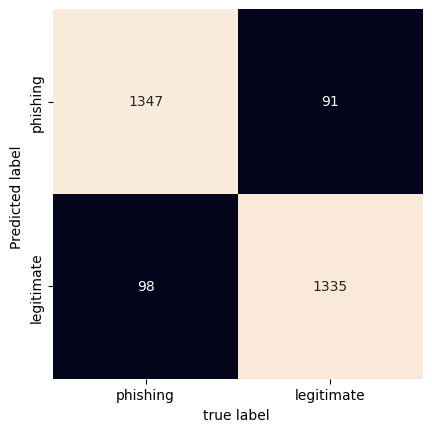

In [186]:
# Let us visualize
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False,
            xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel("true label ")
plt.ylabel("Predicted label ")

In [187]:
pickle.dump(clf, open("phishing_p.pkl", "wb"))
pickle.dump(scaler, open("scalar.pkl", "wb"))


In [188]:
m = { 'ip': 0, 'length_url': 51, 'nb_subdomains': 1, 'nb_hyphens': 1, 'nb_at': 0, 'nb_dollar': 0, 'nb_semicolumn': 0, 'nb_comma': 0, 'nb_colon': 1, 'nb_star': 0, 'nb_slash': 5, 'http_in_path': 1, 'nb_percent': 0, 'https_token': 0, 'ratio_digits_url': 0, 'ratio_digits_host': 0, 'nb_hyperlinks': 211, 'submit_email': 0, 'empty_title': 0, 'domain_in_title': 1,  'popup_window': 0, 'right_clic': 0}
d = pd.DataFrame(m, index=[0])
d.head()

,ip,length_url,nb_subdomains,nb_hyphens,nb_at,nb_dollar,nb_semicolumn,nb_comma,nb_colon,nb_star,...,nb_percent,https_token,ratio_digits_url,ratio_digits_host,nb_hyperlinks,submit_email,empty_title,domain_in_title,popup_window,right_clic
0,0,51,1,1,0,0,0,0,1,0,...,0,0,0,0,211,0,0,1,0,0


In [189]:
d = scaler.transform(d)
d

array([[-4.12691152e-01, -1.76950904e-01, -1.94797698e+00,
         2.93617696e-03, -1.37087809e-01, -2.11703767e-02,
        -1.05141091e-01, -4.42035019e-02, -1.14834639e-01,
        -2.85248953e-02,  3.62995230e-01,  5.92214314e+00,
        -1.02185572e-01, -1.25858397e+00, -5.90691773e-01,
        -2.69433535e-01,  7.61615125e-01,  0.00000000e+00,
        -3.81118612e-01,  5.35540072e-01, -7.79498943e-02,
        -3.73587127e-02]])

In [190]:
clf.predict(d)

array(['phishing'], dtype=object)